In [3]:
 # Here’s how you can use it in tokenizers, including handling the RoBERTa special tokens – of course, you’ll also be able to use it directly from transformers.
from tokenizers.implementations import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing # This post-processor takes care of adding the special tokens needed by a Bert model: a [EOS] token and a [SOS] token
import torch
tokenizer = ByteLevelBPETokenizer(
    "./vocab.json",
    "./merges.txt",
)
tokenizer._tokenizer.post_processor = BertProcessing(
    ("[EOS]", tokenizer.token_to_id("[EOS]")),
    ("[SOS]", tokenizer.token_to_id("[SOS]"))
)

tokenizer.enable_truncation(max_length=60)  # max_length: [SOS]와 [EOS]를 합친 최종길이의 최대값
tokenizer.enable_padding(pad_id=tokenizer.token_to_id("[PAD]"), pad_token="[PAD]", length=60)

# checking
text = "findings: Lung volumes are low.  Retrocardiac opacity with silhouetting of the left hemidiaphragm and lateral border of the descending aorta is nonspecific and could reflect any of a combination of atelectasis, focal pneumonia or even a small effusion.".lower()
print(text)
print('\n')
print(tokenizer.encode(text).tokens)
print('\n')
print(tokenizer.encode(text).ids)

findings: lung volumes are low.  retrocardiac opacity with silhouetting of the left hemidiaphragm and lateral border of the descending aorta is nonspecific and could reflect any of a combination of atelectasis, focal pneumonia or even a small effusion.


['[SOS]', 'findings', ':', 'Ġlung', 'Ġvolumes', 'Ġare', 'Ġlow', '.', 'Ġ', 'Ġretrocardiac', 'Ġopacity', 'Ġwith', 'Ġsilhouetting', 'Ġof', 'Ġthe', 'Ġleft', 'Ġhemidiaphragm', 'Ġand', 'Ġlateral', 'Ġborder', 'Ġof', 'Ġthe', 'Ġdescending', 'Ġaorta', 'Ġis', 'Ġnonspecific', 'Ġand', 'Ġcould', 'Ġreflect', 'Ġany', 'Ġof', 'Ġa', 'Ġcombination', 'Ġof', 'Ġatelectasis', ',', 'Ġfocal', 'Ġpneumonia', 'Ġor', 'Ġeven', 'Ġa', 'Ġsmall', 'Ġeffusion', '.', '[EOS]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


[1, 372, 30, 346, 575, 315, 422, 18, 225, 839, 549, 337, 2654, 299, 269, 356, 758, 312, 535, 1101, 299, 269, 1653, 799, 284, 2553, 312, 746, 945, 1343, 299, 264, 144

In [6]:
tokenizer.add_special_tokens(["[PAD]", "[SOS]", "[EOS]", "[SEP]", "[MASK]"])
target = [1, 372, 30, 346, 575, 315, 422, 18, 225, 839, 549, 337, 2654, 299, 269, 356, 758, 312, 535, 1101, 299, 269, 1653, 799, 284, 2553, 312, 746, 945, 1343, 299, 264, 1443, 299, 429, 16, 491, 486, 380, 2359, 264, 514, 371, 18, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 반드시 리스트로 넣어줘야 함
decoded_text = tokenizer.decode(target, skip_special_tokens=True)

In [8]:
decoded_text.split(' ')

['findings:',
 'lung',
 'volumes',
 'are',
 'low.',
 '',
 'retrocardiac',
 'opacity',
 'with',
 'silhouetting',
 'of',
 'the',
 'left',
 'hemidiaphragm',
 'and',
 'lateral',
 'border',
 'of',
 'the',
 'descending',
 'aorta',
 'is',
 'nonspecific',
 'and',
 'could',
 'reflect',
 'any',
 'of',
 'a',
 'combination',
 'of',
 'atelectasis,',
 'focal',
 'pneumonia',
 'or',
 'even',
 'a',
 'small',
 'effusion.']

In [2]:
tokenizer.get_vocab_size()

14526

In [23]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
print(tokenizer.tokenize(text))

['findings', ':', 'lung', 'volumes', 'are', 'low', '.', 'retro', '##card', '##iac', 'op', '##ac', '##ity', 'with', 'si', '##lho', '##uet', '##ting', 'of', 'the', 'left', 'hem', '##idia', '##ph', '##rag', '##m', 'and', 'lateral', 'border', 'of', 'the', 'descending', 'ao', '##rta', 'is', 'non', '##sp', '##ec', '##ific', 'and', 'could', 'reflect', 'any', 'of', 'a', 'combination', 'of', 'ate', '##le', '##cta', '##sis', ',', 'focal', 'pneumonia', 'or', 'even', 'a', 'small', 'e', '##ff', '##usion', '.']


# Statistics

In [ ]:
# tokenizer에 [SOS] [EOS]붙이는 프로세스 제거 후 진행하기

In [6]:
from pathlib import Path

In [7]:
root = Path('/home/edlab/wcshin/physionet.org/files/mimic-cxr-jpg/2.0.0/preprocessed_reports')
report_path = [str(path) for path in root.glob("**/*.txt")]

In [8]:
len(report_path)

217245

In [9]:
ids_len_list = []
for path in report_path:
    with open(path, 'r') as f:
        data = f.read()
    src = data.replace('  ', ' ').replace('  ', ' ').lower()
    ids_list = tokenizer.encode(src).ids
    ids_len_list.append(len(ids_list))

(array([2.9780e+03, 1.8081e+04, 5.1701e+04, 5.3113e+04, 3.5922e+04,
        2.2766e+04, 1.4420e+04, 7.8960e+03, 4.3630e+03, 2.5620e+03,
        1.3900e+03, 8.1100e+02, 4.8800e+02, 2.4300e+02, 1.8800e+02,
        1.3000e+02, 7.2000e+01, 3.6000e+01, 4.0000e+01, 1.7000e+01,
        1.2000e+01, 5.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  3.        ,  19.33333333,  35.66666667,  52.        ,
         68.33333333,  84.66666667, 101.        , 117.33333333,
        133.66666667, 150.        , 166.33333333, 182.66666667,
        199.        , 215.33333333, 231.66666667, 248.        ,
        264.33333333, 280.66666667, 297.        , 313.33333333,
        329.66666667, 346.        , 362.33333333, 378.66666667,
        395.        , 411.33333333, 427.66666667, 444.        ,
        460.33333333, 476.66666667, 493.        ]),
 <BarContainer object of 30 artists>)

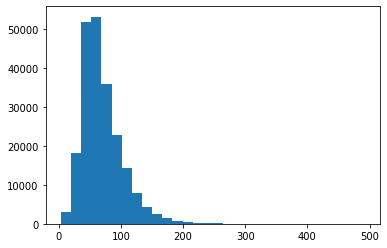

In [10]:
import matplotlib.pyplot as plt
plt.hist(ids_len_list, bins=30)

In [11]:
print("min:", min(ids_len_list))
print("max:", max(ids_len_list))

min: 3
max: 493


In [12]:
for i, length in enumerate(ids_len_list):
    if length == 3:
        print(i)

24032
106596
157163
165384
165761
191079
212982


In [13]:
with open(report_path[24032], 'r') as f:
    data = f.read()

In [14]:
data

'impressions: ___.'

In [15]:
report_path[24032]

'/home/edlab/wcshin/physionet.org/files/mimic-cxr-jpg/2.0.0/preprocessed_reports/s58052703.txt'

In [15]:
tokenizer.encode(data).tokens

['impressions', ':', 'Ġ___.']

In [20]:
tokenizer.encode('___').ids

[414]

In [21]:
tokenizer.encode('___,').ids

[10727]

In [22]:
tokenizer.encode('___.').ids

[7677]

In [23]:
tokenizer.encode(' ___').ids

[415]

In [24]:
tokenizer.encode(' ___,').ids

[677]

In [25]:
tokenizer.encode(' ___.').ids

[636]